### Imports

In [232]:
import os, imageio, matplotlib.pyplot as plt, numpy as np, \
    matplotlib.patches as patches, matplotlib.colors as mplcol

### Determine filenames

In [271]:
fname = 'Z:/behavior/6-23-19-e/raw/e_2019-06-23-161201-0000.avi'
fnameCroprot = os.path.abspath(os.path.join(os.path.dirname(fname), '../croprot/e_2019-06-23-161201_img.npy'))
fnameDLC = os.path.join(os.path.dirname(fnameCroprot), 'e_2019-06-23-161201_dlc.npy')

In [ ]:
frameIdx = int(379.2 * 50)

### Load data

In [272]:
# Load cropped image
imgCroprot = np.memmap(fnameCroprot, mode='r', dtype=np.uint8)
N = imgCroprot.size // (200 * 200)
imgCroprot = np.memmap(fnameCroprot, mode='r', dtype=np.uint8, shape=(N, 200, 200))

In [273]:
# Obtain raw AVI frame
r = imageio.get_reader(fname)
imgFrame = r.get_data(frameIdx)
r.close()

In [274]:
# Get skeleton information
arrPos = np.memmap(fnameDLC, dtype=np.float32, mode='r', shape=(N, 3, 26))
arrPos.shape

(826000, 3, 26)

In [275]:
# Define color scheme
COLORS = [
    (0, 0, 0),
    (230, 159, 0),
    (0, 158, 115),
    (0, 114, 178),
    (204, 121, 167)
]
COLORS = [mplcol.rgb2hex(np.array(x) / 255.0) for x in COLORS]

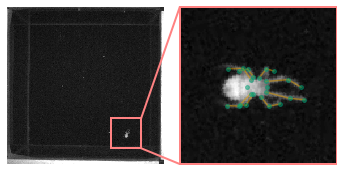

In [306]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2.5))

# Plot whole frame
ax.imshow(np.clip(imgFrame.astype(int) * 2, 0, 255), extent=[-220, -20, 0, 200])

# Plot limb lines
ax.imshow(imgCroprot[frameIdx,40:160,50:170], cmap='gray', extent=[0, 200, 0, 200])

d = arrPos[frameIdx, 0:2, :].T.copy()
d[:,1] = 200 - d[:,1]
d -= np.array([50, 40])
d *= 200 / 120

def _plot(i, j):
    if not np.isnan(d[i,0]) and not np.isnan(d[i,1]) and \
            not np.isnan(d[j, 0]) and not np.isnan(d[j, 1]):
        ax.plot([d[i,0], d[j,0]], [d[i,1], d[j,1]], color=COLORS[1], alpha=0.5)
        
_plot(14,18); _plot(18,22)
_plot( 2, 6); _plot( 6,10)

_plot(15,19); _plot(19,23)
_plot( 3, 7); _plot( 7,11)

_plot(16,20); _plot(20,24)
_plot( 4, 8); _plot( 8,12)

_plot(17,21); _plot(21,25)
_plot( 5, 9); _plot( 9,13)

for i in range(26):
    ax.scatter(d[i,0], d[i,1], color=COLORS[2], s=15, zorder=10, alpha=0.5)
    
# Highlighting
highlightCol = '#ff8282'

rect = patches.Rectangle((0,0), 200, 200, linewidth=2, edgecolor=highlightCol, facecolor='none', zorder=10)
ax.add_patch(rect)

w = 200 / (1024 / 200)
rect = patches.Rectangle((-88, 20), w, w, linewidth=2, edgecolor=highlightCol, facecolor='none', zorder=10)
ax.add_patch(rect)

plt.plot([-88 + w, 0], [20, 0], color=highlightCol, linewidth=2, zorder=10)
plt.plot([-88 + w, 0], [20 + w, 200], color=highlightCol, linewidth=2, zorder=10)

# Set limits, etc.
ax.set_xlim(-220, 201)
ax.set_ylim(-1, 201)
ax.set_axis_off()
fig.tight_layout()

# Save
fig.savefig('C:/Users/acorver/Desktop/paper-figures/fig1b.pdf', dpi=250)